## SESSION 2: Measuring code performance

<br> \textbf{OBJECTIVE: Submit a performance analysis of a self-implemented physics textbook function or constant using Julia benchmarking tools.}
<br> •  KR1: Implemented (customized) at least one math/physics textbook function, or constant (prefer those that involve a sum or a loop) in Julia. Discuss its importance in Physics. See Resources in the webpage.
<br> •  KR2: Compare the performance (accuracy) of the implemented function in comparison with the existing special functions within Julia (or a reliable module)
<br> •  KR3: Successful loading of the `BenchmarkTools` module. May need to add it first via the `Pkg` or REPL package mode.
<br> •  KR4: Itemized differences between `@time`, `@btime`, `@benchmark` and other `@time`-like macros. Nice if the situations when they are best applied are mentioned.
<br> •  KR5: Identified demonstrated useful features within the `Profiler` module of Julia. Features must be explained why useful for your case.
<br> •  KR6: A discussion of the performance of the implemented function above.

In [6]:
using Plots


In [7]:
N = 1000

#GENERATE A SQUARE WAVE
y1 = -ones(N)
y1[1:N÷2] .= 1

#GENERATE A SAWTOOTH WAVE
y2 = range(0, stop=N)

#GENERATE A MODULATED SINE WAVE
n = range(0, stop=N)
y3 = sin.(pi*n/N).*sin.(20*pi*n/N);

In [13]:
?square

search:

Couldn't find square
Perhaps you meant sqrt, quote or isequal


No documentation found.

Binding `square` does not exist.


In [8]:
function dft(y)
    N = length(y)
    c = zeros(ComplexF64, N÷2 + 1)
    c_list = zeros(ComplexF64, 0)
    for k in range(1, stop=N÷2)
        for n in range(1,stop=N)
            c[k] += y[n]*exp(-2im*pi*k*n/N)
            append!(c_list, (c[k]))
            #print(c[k])
        end
    return c_list
    end
end

dft (generic function with 1 method)

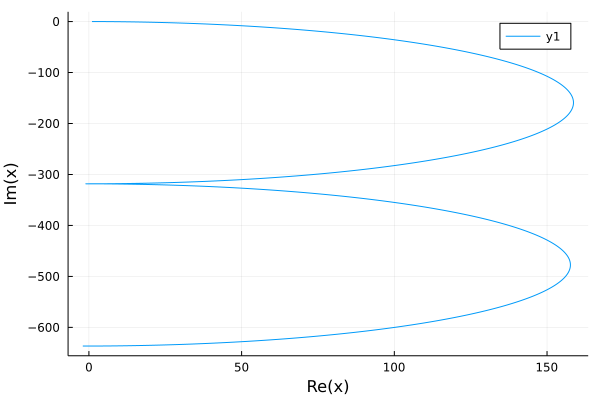

In [9]:
plot(dft(y1))

In [106]:
c = zeros(ComplexF64, N÷2 + 1)
length(c)

26

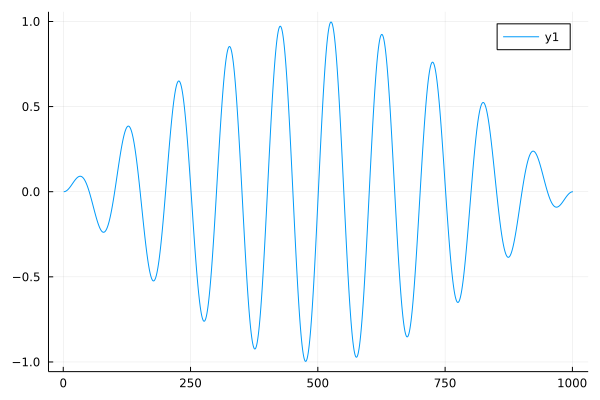

In [146]:
plot(y3)

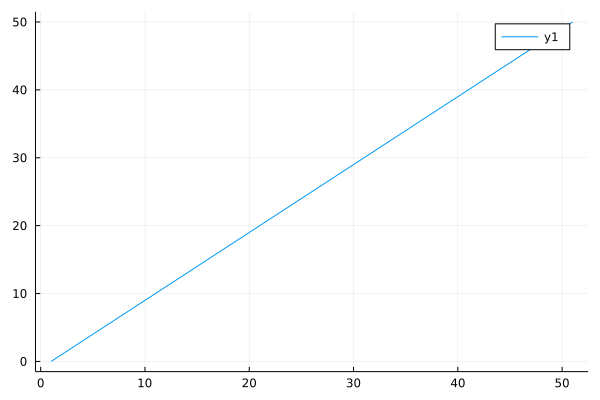

In [119]:
plot(y2)

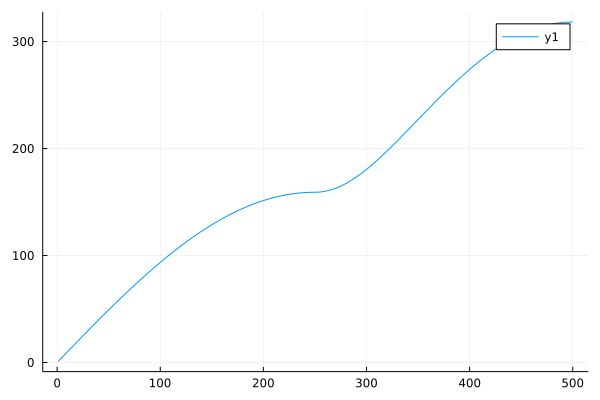

In [6]:
using Plots

plot(abs.(dft(y1)))

In [7]:
?abs

search: abs abs2 abspath abstract AbstractSet AbstractRGB abstract type



```
abs(x)
```

The absolute value of `x`.

When `abs` is applied to signed integers, overflow may occur, resulting in the return of a negative value. This overflow occurs only when `abs` is applied to the minimum representable value of a signed integer. That is, when `x == typemin(typeof(x))`, `abs(x) == x < 0`, not `-x` as might be expected.

# Examples

```jldoctest
julia> abs(-3)
3

julia> abs(1 + im)
1.4142135623730951

julia> abs(typemin(Int64))
-9223372036854775808
```


In [8]:
y = [1,2,3,4]
N = length(y)
c = zeros(N÷2 + 1)
# for k in range(1, stop=N÷2)
#     println(k)
#     for n in range(1,stop=N)
#         println(n)
#     end
# end

3-element Vector{Float64}:
 0.0
 0.0
 0.0

In [9]:
?zeros

search: zeros count_zeros set_zero_subnormals get_zero_subnormals leading_zeros



```
zeros([T=Float64,] dims::Tuple)
zeros([T=Float64,] dims...)
```

Create an `Array`, with element type `T`, of all zeros with size specified by `dims`. See also [`fill`](@ref), [`ones`](@ref).

# Examples

```jldoctest
julia> zeros(1)
1-element Vector{Float64}:
 0.0

julia> zeros(Int8, 2, 3)
2×3 Matrix{Int8}:
 0  0  0
 0  0  0
```


In [10]:
XX = range(1, stop=N÷2)
for i in XX
    println(i)
end

1
2


In [11]:
for n in range(1,stN)
    println(n)
end

LoadError: UndefVarError: stN not defined

In [12]:
n = 2
k = 1
y[n]*exp(-2im*pi*k*n/N)

-2.0 - 2.4492935982947064e-16im

In [22]:
y = 0.5772156649015329


0.5772156649015329

In [137]:
gamma(10)

0.0077002597937975885

In [132]:
function Gamma(z)
    N = 1000000
    f = 1
    for n in range(2, stop=N+2)
        f*=((1+(z/n))^(-1))*exp(z/n)
    #print(f)
    return exp(-y*z)/z*f
    end
end

Gamma (generic function with 1 method)

In [133]:
Gamma(10)

0.0077002597937975885

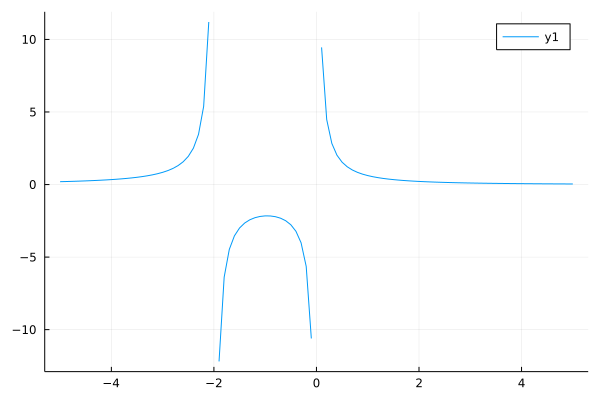

In [131]:
z = range(-5, step=0.1, stop=5)
plot(z, gamma.(z))

In [93]:
?range

search: range LinRange UnitRange StepRange StepRangeLen trailing_zeros



```
range(start[, stop]; length, stop, step=1)
```

Given a starting value, construct a range either by length or from `start` to `stop`, optionally with a given step (defaults to 1, a [`UnitRange`](@ref)). One of `length` or `stop` is required.  If `length`, `stop`, and `step` are all specified, they must agree.

If `length` and `stop` are provided and `step` is not, the step size will be computed automatically such that there are `length` linearly spaced elements in the range.

If `step` and `stop` are provided and `length` is not, the overall range length will be computed automatically such that the elements are `step` spaced.

Special care is taken to ensure intermediate values are computed rationally. To avoid this induced overhead, see the [`LinRange`](@ref) constructor.

`stop` may be specified as either a positional or keyword argument.

!!! compat "Julia 1.1"
    `stop` as a positional argument requires at least Julia 1.1.


# Examples

```jldoctest
julia> range(1, length=100)
1:100

julia> range(1, stop=100)
1:100

julia> range(1, step=5, length=100)
1:5:496

julia> range(1, step=5, stop=100)
1:5:96

julia> range(1, 10, length=101)
1.0:0.09:10.0

julia> range(1, 100, step=5)
1:5:96
```

---

```
range(start::T; stop::T, length=100) where T<:Colorant
range(start::T, stop::T; length=100) where T<:Colorant
```

Generates N (=`length`) >2 colors in a linearly interpolated ramp from `start` to`stop`, inclusive, returning an `Array` of colors.

!!! compat "Julia 1.1"
    `stop` as a positional argument requires at least Julia 1.1.

